In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Centroids of clusters
centers = [[0, 1], [2, 3], [4, 6]]

#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalizing
X = StandardScaler().fit_transform(X)

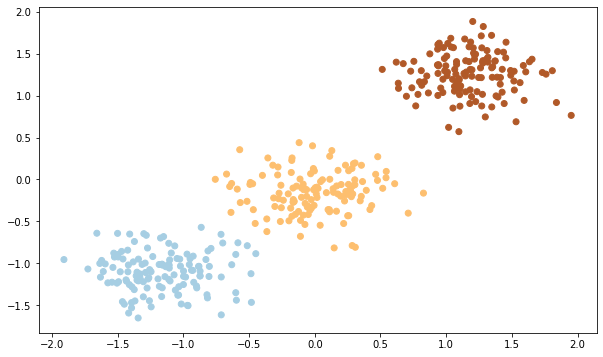

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters by main DBSCAN')

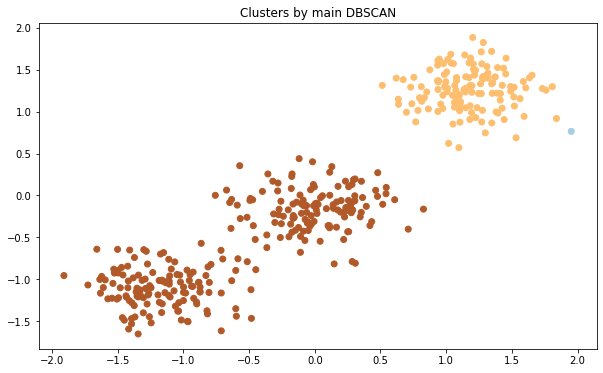

In [ ]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by main DBSCAN")

In [ ]:
# My idea for improving dbscan by calculating "eps" for each density level in dataset.
# Then averaging.

import numpy as np

def euclidean_dist_n_dim(x, y):
    dist_pow2 = 0
    
    for i in range(len(x)):
        dist_pow2 += pow((x[i]-y[i]),2)
        
    dist = np.sqrt(dist_pow2)
    return dist
        
        

In [ ]:
# My method for calculating 3th nearest neighbour's distance for a point in dataset
# Because all_points includes the point itself, index = 3 will be distance to third nearest neighbour
# And index = 0 will be zero --> distance between point and itself = 0

def thirdNN_dist(my_point , all_points):
    distances = [None] * len(all_points)
    for i in range(len(all_points)):
        distances[i] = euclidean_dist_n_dim(my_point , all_points[i])
    distances.sort()
    return distances[3]
    
    
def thirdNN_dist_all_points(all_points):
    thirdNN_distances_all = [None] * len(all_points)
    for i in range(len(all_points)):
        thirdNN_distances_all[i] = thirdNN_dist(all_points[i] , all_points)
    thirdNN_distances_all.sort()
    return thirdNN_distances_all
        
    
    

In [ ]:

#####JUST TEST CELL########


#X_test = [[1,1] ,[2,2], [3,3], [0,0] ,[-0.5,-0.5]]

#thirdNN_dist(X_test[3] , X_test)

#thirdNN_dist(X[200] , X)

X_test = [[0,1] ,[0,3], [0,4], [0,5] ,[0,-1]]

thirdNN_dist_all_points(X_test)




[2.0, 3.0, 3.0, 4.0, 5.0]

In [ ]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

In [ ]:
#CREATING OUR THREE DATASETS

#FIRST
#Centroids of clusters
centers1 = [[0, 0], [2, 6], [8, 10]]

#Create dataset
X1, y1 = make_blobs(n_samples=500, centers=centers1, 
                  cluster_std=1, random_state=0)
#Normalizing
X1 = StandardScaler().fit_transform(X1)



#SECOND
#Centroids of clusters
centers2 = [[0, 2], [2, 5], [6, 8]]

#Create dataset
X2, y2 = make_blobs(n_samples=400, centers=centers2, 
                  cluster_std=0.9, random_state=0)



#Normalizing
X2 = StandardScaler().fit_transform(X2)


#THIRD
#Centroids of clusters
centers3 = [[2,2], [2, 6], [3, 0]]

#Create dataset
X3, y3 = make_blobs(n_samples=350, centers=centers3, 
                  cluster_std=0.8, random_state=0)


#Normalizing
X3 = StandardScaler().fit_transform(X3)




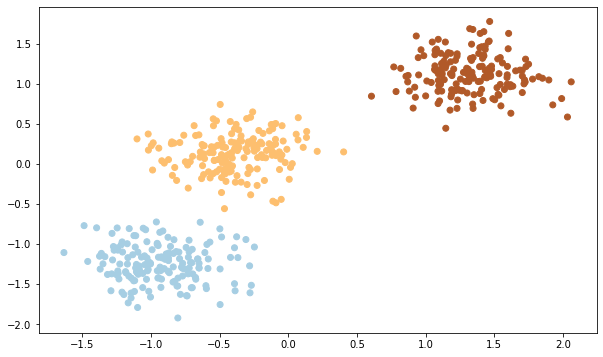

In [ ]:
#Plotting first dataset
plt.figure(figsize=(10,6))
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap='Paired')

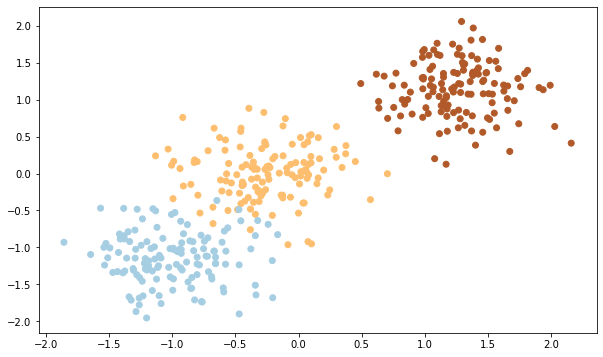

In [ ]:
#Plotting second dataset
plt.figure(figsize=(10,6))
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap='Paired')

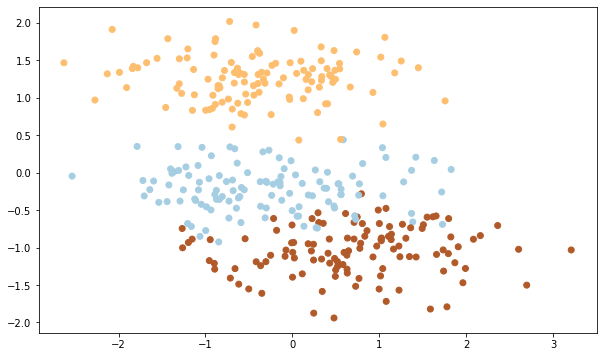

In [ ]:
#Plotting third dataset
plt.figure(figsize=(10,6))
plt.scatter(X3[:,0], X3[:,1], c=y3, cmap='Paired')

In [ ]:
def axis_values(dists):
    axis_one = [None] * len(dists)
    for i in range(len(dists)):
        axis_one[i] = i+1
    return axis_one , dists
        

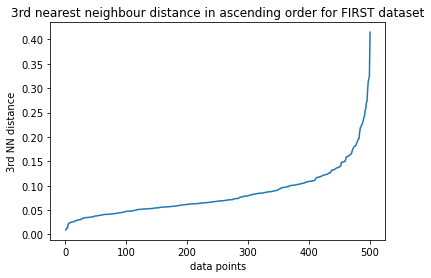

In [ ]:
# lets start to test my idea
#print(X1)

first_dataset_thirdNN_dists = thirdNN_dist_all_points(X1)

axis_one , axis_two = axis_values(first_dataset_thirdNN_dists)

# plotting the points
plt.plot(axis_one , axis_two)

# naming the x axis
plt.xlabel('data points')

# naming the y axis
plt.ylabel('3rd NN distance')

# giving a title to my graph
plt.title('3rd nearest neighbour distance in ascending order for FIRST dataset')

# function to show the plot
plt.show()




In [ ]:
# applying average eps to dbscan

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15, min_samples=20)
db.fit(X1)


DBSCAN(eps=0.15, min_samples=20)

Text(0.5, 1.0, 'Clusters by DBSCAN with best eps for FIRST dataset')

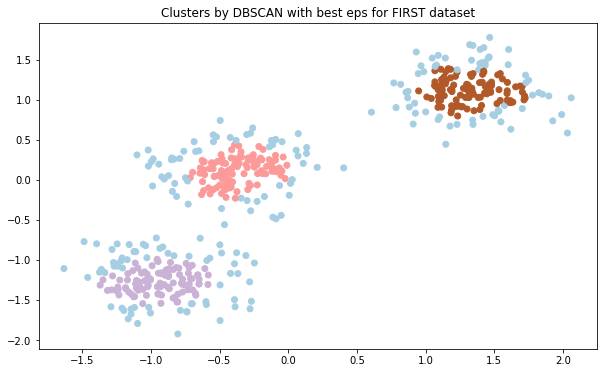

In [ ]:
y_pred = db.fit_predict(X1)
plt.figure(figsize=(10,6))
plt.scatter(X1[:,0], X1[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with best eps for FIRST dataset")

In [ ]:
db = DBSCAN(eps=0.8, min_samples=20)
db.fit(X1)

DBSCAN(eps=0.8, min_samples=20)

Text(0.5, 1.0, 'Clusters by DBSCAN with arbitrary eps for FIRST dataset')

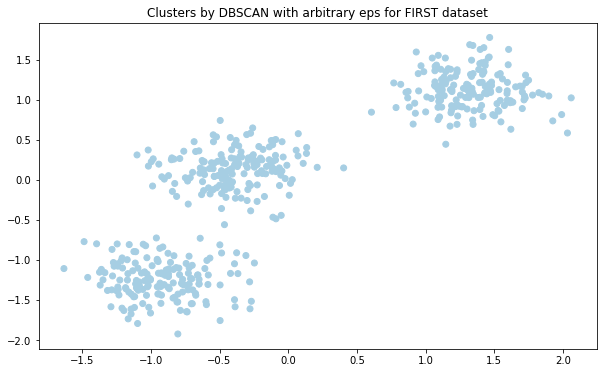

In [ ]:
y_pred = db.fit_predict(X1)
plt.figure(figsize=(10,6))
plt.scatter(X1[:,0], X1[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with arbitrary eps for FIRST dataset")

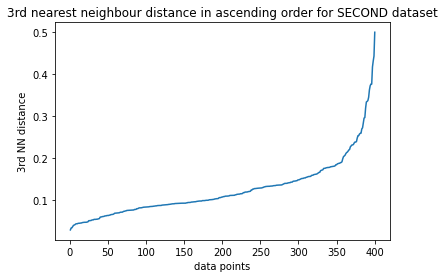

In [ ]:
second_dataset_thirdNN_dists = thirdNN_dist_all_points(X2)

axis_one , axis_two = axis_values(second_dataset_thirdNN_dists)

# plotting the points
plt.plot(axis_one , axis_two)

# naming the x axis
plt.xlabel('data points')

# naming the y axis
plt.ylabel('3rd NN distance')

# giving a title to my graph
plt.title('3rd nearest neighbour distance in ascending order for SECOND dataset')

# function to show the plot
plt.show()



In [ ]:
# applying average eps to dbscan

db = DBSCAN(eps=0.25, min_samples=20)
db.fit(X2)


DBSCAN(eps=0.25, min_samples=20)

Text(0.5, 1.0, 'Clusters by DBSCAN with best eps for SECOND dataset')

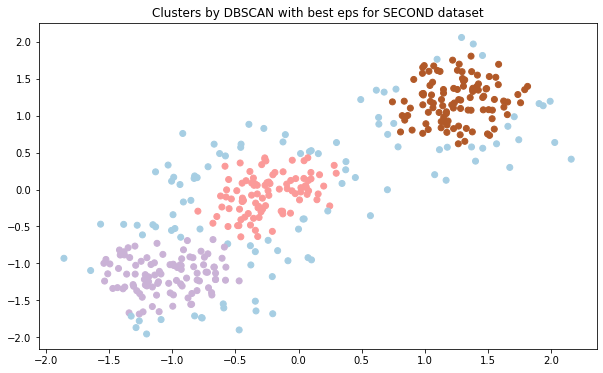

In [ ]:
y_pred = db.fit_predict(X2)
plt.figure(figsize=(10,6))
plt.scatter(X2[:,0], X2[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with best eps for SECOND dataset")

In [ ]:
# applying arbitrary eps to dbscan

db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X2)


DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters by DBSCAN with arbitrary eps for SECOND dataset')

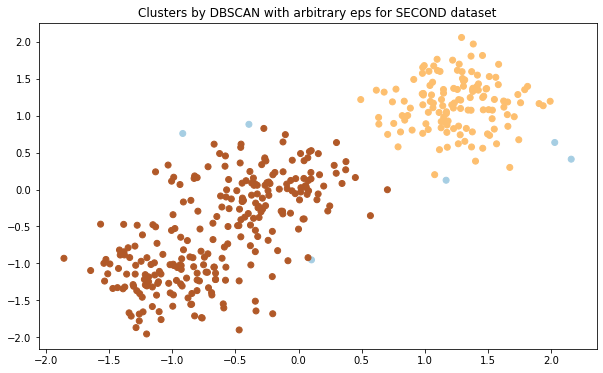

In [ ]:
y_pred = db.fit_predict(X2)
plt.figure(figsize=(10,6))
plt.scatter(X2[:,0], X2[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with arbitrary eps for SECOND dataset")

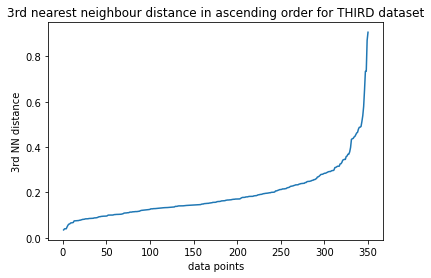

In [ ]:
third_dataset_thirdNN_dists = thirdNN_dist_all_points(X3)

axis_one , axis_two = axis_values(third_dataset_thirdNN_dists)

# plotting the points
plt.plot(axis_one , axis_two)

# naming the x axis
plt.xlabel('data points')

# naming the y axis
plt.ylabel('3rd NN distance')

# giving a title to my graph
plt.title('3rd nearest neighbour distance in ascending order for THIRD dataset')

# function to show the plot
plt.show()


In [ ]:
# applying average eps to dbscan

db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X3)


DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters by DBSCAN with best eps for THIRD dataset')

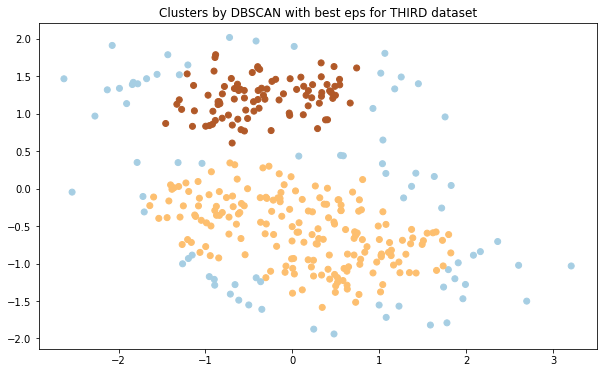

In [ ]:
y_pred = db.fit_predict(X3)
plt.figure(figsize=(10,6))
plt.scatter(X3[:,0], X3[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with best eps for THIRD dataset")

In [ ]:
# applying arbitrary eps to dbscan

db = DBSCAN(eps=0.3, min_samples=20)
db.fit(X3)


DBSCAN(eps=0.3, min_samples=20)

Text(0.5, 1.0, 'Clusters by DBSCAN with arbitrary eps for THIRD dataset')

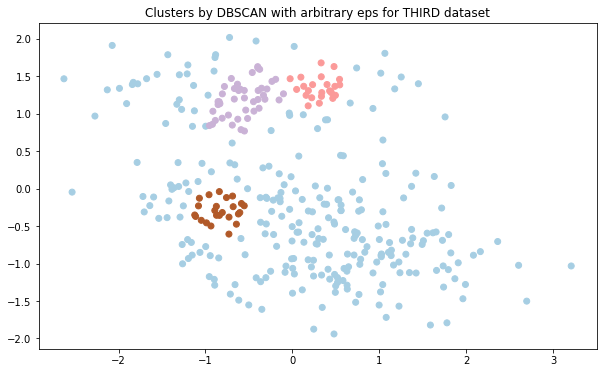

In [ ]:
y_pred = db.fit_predict(X3)
plt.figure(figsize=(10,6))
plt.scatter(X3[:,0], X3[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with arbitrary eps for THIRD dataset")

In [ ]:

###JUST TEST###
a = [1,4,7]
t1,t2 = axis_values(a)
print(t1)
print(t2)


[1, 2, 3]
[1, 4, 7]


In [ ]:
import pandas as pd



dataset = pd.read_csv("Mall_Customers.csv")
#print(dataset)

dataset_list = dataset.values.tolist()
#print(dataset_list)

shorted_list = [None] * len(dataset_list)

#removing user id
for i in range(len(dataset_list)):
    shorted_list[i] = dataset_list[i][1:5]

    
# encoding male and famale
# Male = 1 , Female = 0
coded_list = shorted_list
for i in range(len(dataset_list)):
    if shorted_list[i][0] == 'Male':
        coded_list[i][0] = 1
    else:
        coded_list[i][0] = 0
                
# now we will use coded_list as our dataset



In [ ]:
coded_list = StandardScaler().fit_transform(coded_list)



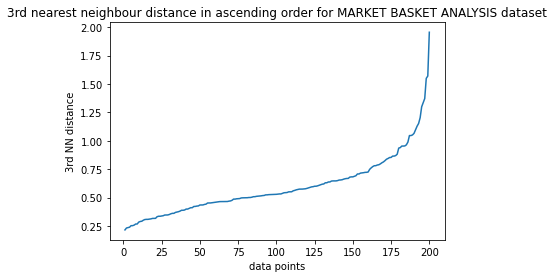

In [ ]:
market_dataset_thirdNN_dists = thirdNN_dist_all_points(coded_list)

axis_one , axis_two = axis_values(market_dataset_thirdNN_dists)

# plotting the points
plt.plot(axis_one , axis_two)

# naming the x axis
plt.xlabel('data points')

# naming the y axis
plt.ylabel('3rd NN distance')

# giving a title to my graph
plt.title('3rd nearest neighbour distance in ascending order for MARKET BASKET ANALYSIS dataset')

# function to show the plot
plt.show()

In [ ]:

db = DBSCAN(eps=1, min_samples=10)
db.fit(coded_list)

DBSCAN(eps=1, min_samples=10)

Text(0.5, 1.0, 'Clusters by DBSCAN with best eps for MARKET BASKET ANALYSIS dataset')

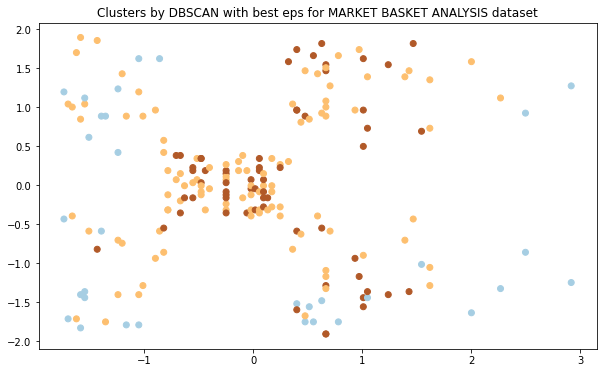

In [ ]:
y_pred = db.fit_predict(coded_list)
plt.figure(figsize=(10,6))
plt.scatter(coded_list[:,2], coded_list[:,3],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with best eps for MARKET BASKET ANALYSIS dataset")

In [ ]:
db = DBSCAN(eps=2, min_samples=10)
db.fit(coded_list)

DBSCAN(eps=2, min_samples=10)

Text(0.5, 1.0, 'Clusters by DBSCAN with arbitrary eps for MARKET BASKET ANALYSIS dataset')

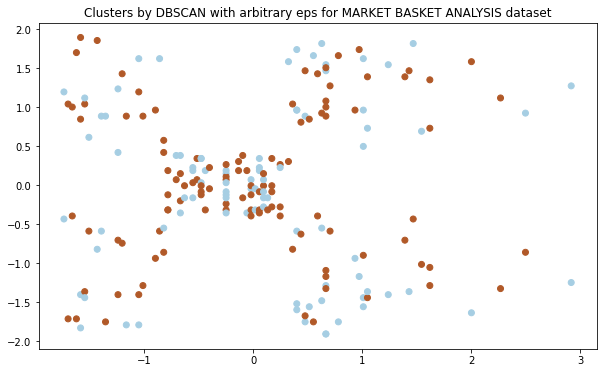

In [ ]:
y_pred = db.fit_predict(coded_list)
plt.figure(figsize=(10,6))
plt.scatter(coded_list[:,2], coded_list[:,3],c=y_pred, cmap='Paired')
plt.title("Clusters by DBSCAN with arbitrary eps for MARKET BASKET ANALYSIS dataset")